Introduzca la función                : x**2-sin(x)-0.5
Introduzca a                         : 0
Introduzca b                         : 2
Introduzca la tolerancia             : .001
Introduzca el error de la función    : .001
Introduzca el máximo de iteraciones  : 10


 i         a            c            b          f(a)         f(c)         f(b)           h
01     0.000000     1.000000     2.000000    -0.500000    -0.341471     2.590703     1.000000   
02     1.000000     1.500000     2.000000    -0.341471     0.752505     2.590703     0.500000   
03     1.000000     1.250000     1.500000    -0.341471     0.113515     0.752505     0.250000   
04     1.000000     1.125000     1.250000    -0.341471    -0.136643     0.113515     0.125000   
05     1.125000     1.187500     1.250000    -0.136643    -0.017281     0.113515     0.062500   
06     1.187500     1.218750     1.250000    -0.017281     0.046682     0.113515     0.031250   
07     1.187500     1.203125     1.218750    -0.017281    

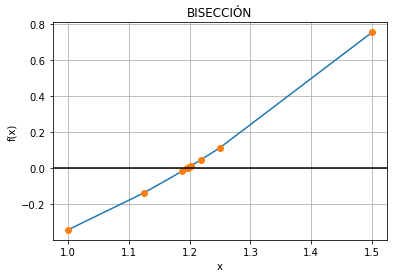

In [4]:
# MÉTODO DE LA BISECCIÓN. Funciona de narices, pero no sé porqué c.j.n.s el formato de salida falla
#                         con algunas funciones, p.e. con f=sin(x)-x**2+1 funciona y con f=sin(x)+x**2-1
#                         No tiene sentido porque falla solamente el formato de salida. Voy a investigarlo


# IMPORTACIÓN DE LIBRERÍAS

import numpy as np
from sympy import *
from sympy.abc import x
import matplotlib.pyplot as plt

# FUNCIÓN BISECCIÓN

def biseccion(f,a,b,tolerancia,errorfun,maxiter):

    f = sympify(f)
    fa = f.subs(x,a)
    fb = f.subs(x,b)

    if fa * fb >= 0:
        tabla = []
        raiz = false
        solucion = false
        return (tabla,raiz,solucion)

    solucion=true
    tabla = []
    h = b - a

    i = 1
    while 1:
        h = h / 2
        c = (a + b) / 2
        fc = f.subs(x,c)
        tabla.append([i,a,c,b,fa,fc,fb,h])
        i = i + 1

        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc

        if not(h >= tolerancia and abs(fc) >= errorfun and i <= maxiter):
            break

    tabla = np.array(tabla)
    c = (a + b) / 2              # OjO: aquí está la diferencia
    raiz = c

    return(tabla,raiz,solucion)


# ENTRADA DE DATOS

f = input('Introduzca la función                : ')
a = float(input('Introduzca a                         : '))
b = float(input('Introduzca b                         : '))
tolerancia = float(input('Introduzca la tolerancia             : '))
errorfun = float(input('Introduzca el error de la función    : '))
maxiter = int(input('Introduzca el máximo de iteraciones  : '))


# LLAMADA A LA FUNCIÓN biseccion

(tabla,raiz,solucion) = biseccion(f,a,b,tolerancia,errorfun,maxiter)


# SALIDA DE RESULTADOS

if solucion == false:
    print('\n')
    print("El método de la bisección no se puede aplicar: f(a)*f(b)>=0")
    print('\n')

if solucion == true:
    print('\n')
    print(' i         a            c            b          f(a)         f(c)         f(b)           h')
    n = len(tabla)
    for i in range(0,n,1):
        unafila = tabla[i]
        formato = '{:0>2d}'+'   '+(len(unafila)-1)*'{:>10.6f}   '
        unafila = formato.format(*unafila)
        print(unafila)
    print('\n','raiz: ',raiz,'\n','\n')

    n = len(tabla)
    for i in range(0,n,1):
        unafila = tabla[i]
        formato = '{!s:>2.2s}'+' '+(len(unafila)-1)*'{!s:>12.9s} '
        unafila = formato.format(*unafila)
        print(unafila)
    print('\n','raiz: ',raiz,'\n','\n')

    
# REPRESENTACIÓN GRÁFICA

xi = tabla[:,2]
yi = tabla[:,5]

orden = np.argsort(xi)
xi = xi[orden]
yi = yi[orden]

plt.plot(xi,yi)
plt.plot(xi,yi,'o')
plt.axhline(0, color="black")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('BISECCIÓN')
plt.grid()
plt.show()